## Imports

In [1]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import skimage
import cv2
from statistics import mean
import importlib

## Other

In [14]:
a = np.random.rand(32, 199, 2)
a_ = a[:, ::16, :]
print(a_.shape)

(32, 13, 2)


In [ ]:
gen1 = np.array([
    [-118.78782334,  -27.94693492],
    [-117.47305298,  -28.81773186],
    [-115.95080566,  -29.56648254]
])

gen2 = np.array([
    [-118.78782334,  -27.94693492],
    [-117.52101898,  -28.56824875],
    [-115.82861328,  -29.4161129 ],
    [-114.06791687,  -30.31990814],
    [-112.27102661,  -31.26221466],
    [-110.39716339,  -32.32287979]
])

gen3 = np.array([
    [-118.78782334,  -27.94693492],
    [-117.8640976 ,  -29.2577076 ],
    [-117.06825256,  -30.97887039],
    [-116.81121826,  -33.09387207],
    [-117.07551575,  -35.64902878]
])

gt = np.array([
    [-118.78782334,  -27.94693492],
    [-117.61347336,  -28.70616014],
    [-116.2698075 ,  -29.59005175]
])

## Plots

#### 1.a.1) Plot scenarios from generated padded samples 

In [ ]:
map_dir = '/data/tii/data/nuscenes/nuscenes_maps/nuscenes_trainval_maps_train'
data_real_dir = '/data/tii/data/nuscenes/nuscenes_trainval_clean_train/'
data_gen_dir = '/data/ahmed.ghorbel/workdir/autod/traffic-diffuser/results/TrafficDiffuser-S-mlp/samples'
max_plots = 20
num_samples = 10
figsize = (10, 10)

for l_real, l_gen, l_map in zip(sorted(os.listdir(data_real_dir)), sorted(os.listdir(data_gen_dir)), sorted(os.listdir(map_dir))):
    print(l_real)
    print(l_gen)
    print(l_map)
    
    data_map = np.load(os.path.join(map_dir, l_map))
    data_real, data_gen = np.load(os.path.join(data_real_dir, l_real)), np.load(os.path.join(data_gen_dir, l_gen))
    data_hist, data_future = data_real[:, :8, :], data_real[:, 7:, :]
    print(f'Real data has shape: {data_real.shape}, and generated data has shape {data_gen.shape}')
    
    plt.figure(figsize=figsize)
    
    # Plot the map for the considered scene
    print(f'Map data has shape: {data_map.shape}')
    for ft in range(data_map.shape[0]):    
        plt.plot(data_map[ft, :, 0], data_map[ft, :, 1], color='gray', linewidth=0.3)
    
    # Loop through each scene and plot separately
    epsilon = 0.1   # to discard the predicted padding because its not exactely equal to zero
    for ag in range(data_future.shape[0]):  # Loop through each agent in the scene (MAX to 9 in clean testset)    
        for sample_idx in range(num_samples):
            #-- add the first timestep of data_future to have a continuity between hist and gen trajs
            agent_gen = np.concatenate((data_future[ag, 0:1, :], data_gen[sample_idx, ag, :, :]), axis=0)   
            valid_agent_gen = agent_gen[(np.abs(agent_gen[:, 0]) > epsilon) & (np.abs(agent_gen[:, 1]) > epsilon)]
            plt.plot(valid_agent_gen[:, 0], valid_agent_gen[:, 1], 'b-.o', linewidth=1.2, markersize=2.8)
        
        agent_hist, agent_future = data_hist[ag], data_future[ag] 
        valid_agent_future = agent_future[(agent_future[:, 0] != 0.0) & (agent_future[:, 1] != 0.0)]
        plt.plot(valid_agent_future[:, 0], valid_agent_future[:, 1], 'g-o', linewidth=1.2, markersize=2.8)

        valid_agent_hist = agent_hist[(agent_hist[:, 0] != 0.0) & (agent_hist[:, 1] != 0.0)]
        plt.plot(valid_agent_hist[:, 0], valid_agent_hist[:, 1], 'k-o', linewidth=1.2, markersize=2.8)
    
    max_plots -= 1
    if max_plots == 0:
        break
    plt.show() 
    plt.close()  

In [ ]:
map_dir = '/data/tii/data/nuscenes/nuscenes_maps/nuscenes_trainval_maps_test'
data_real_dir = '/data/tii/data/nuscenes/nuscenes_trainval_clean_test/'
data_gen_dir = '/data/ahmed.ghorbel/workdir/autod/traffic-diffuser/results/TrafficDiffuser-L-map-mlp/samples'
max_plots = 20
figsize = (5, 5)

for l_real, l_gen, l_map in zip(sorted(os.listdir(data_real_dir)), sorted(os.listdir(data_gen_dir)), sorted(os.listdir(map_dir))):
    print(l_real)
    print(l_gen)
    print(l_map)
    
    data_map = np.load(os.path.join(map_dir, l_map))
    data_real, data_gen = np.load(os.path.join(data_real_dir, l_real)), np.load(os.path.join(data_gen_dir, l_gen))
    data_hist, data_future = data_real[:, :8, :], data_real[:, 7:, :]
    print(f'Real data has shape: {data_real.shape}, and generated data has shape {data_gen.shape}')
    
    plt.figure(figsize=figsize)
    
    # Plot the map for the considered scene
    for ft in range(data_map.shape[0]):    
        plt.plot(data_map[ft, :, 0], data_map[ft, :, 1], color='gray', linewidth=0.3)
    
    # Loop through each scene and plot separately
    epsilon = 0.1   # to discard the predicted padding because its not exactely equal to zero
    for ag in range(data_future.shape[0]):  # Loop through each agent in the scene (MAX to 9 in clean testset)    
        #for sample_idx in range(10):
        #    #-- add the first timestep of data_future to have a continuity between hist and gen trajs
        #    agent_gen = np.concatenate((data_future[ag, 0:1, :], data_gen[sample_idx, ag, :, :]), axis=0)   
        #    valid_agent_gen = agent_gen[(np.abs(agent_gen[:, 0]) > epsilon) & (np.abs(agent_gen[:, 1]) > epsilon)]
        #    plt.plot(valid_agent_gen[:, 0], valid_agent_gen[:, 1], 'b-.o', linewidth=1.2, markersize=2.8)
        
        agent_hist, agent_future = data_hist[ag], data_future[ag] 
        valid_agent_future = agent_future[(agent_future[:, 0] != 0.0) & (agent_future[:, 1] != 0.0)]
        plt.plot(valid_agent_future[:, 0], valid_agent_future[:, 1], 'g-o', linewidth=1.2, markersize=2.8)

        valid_agent_hist = agent_hist[(agent_hist[:, 0] != 0.0) & (agent_hist[:, 1] != 0.0)]
        plt.plot(valid_agent_hist[:, 0], valid_agent_hist[:, 1], 'k-o', linewidth=1.2, markersize=2.8)
    
    max_plots -= 1
    if max_plots == 0:
        break
    plt.show() 
    plt.close()  

#### 1.a.2) Plot scenarios from a selection of generated padded samples

In [ ]:
map_dir = '/data/tii/data/nuscenes/nuscenes_maps/nuscenes_trainval_maps_test'
data_real_dir = '/data/tii/data/nuscenes/nuscenes_trainval_clean_test/'
data_gen_dir = '/data/ahmed.ghorbel/workdir/autod/traffic-diffuser/results/TrafficDiffuser-S-mlp/samples'

selected_scenarios = ['sd_nuscenes_v1.0-trainval_scene-0004.npy',
                      'sd_nuscenes_v1.0-trainval_scene-0007.npy',
                      'sd_nuscenes_v1.0-trainval_scene-0018.npy']
map_list = [os.path.join(map_dir, file) for file in selected_scenarios]
data_real_list = [os.path.join(data_real_dir, file) for file in selected_scenarios]
data_gen_list = [os.path.join(data_gen_dir, '0084000_' + file) for file in selected_scenarios]

figsize = (10, 10)
num_samples = 10
for l_real, l_gen, l_map in zip(sorted(data_real_list), sorted(data_gen_list), sorted(map_list)):
    print(l_real)
    print(l_gen)
    print(l_map)
    
    data_map = np.load(os.path.join(map_dir, l_map))
    data_real, data_gen = np.load(os.path.join(data_real_dir, l_real)), np.load(os.path.join(data_gen_dir, l_gen))
    data_hist, data_future = data_real[:, :8, :], data_real[:, 7:, :]
    print(f'Real data has shape: {data_real.shape}, and generated data has shape {data_gen.shape}')
    
    plt.figure(figsize=figsize)
    
    # Plot the map for the considered scene
    print(f'Map data has shape: {data_map.shape}')
    for ft in range(data_map.shape[0]):    
        plt.plot(data_map[ft, :, 0], data_map[ft, :, 1], color='gray', linewidth=0.3)
    
    # Loop through each scene and plot separately
    epsilon = 0.1   # to discard the predicted padding because its not exactely equal to zero
    for ag in range(data_future.shape[0]):  # Loop through each agent in the scene (MAX to 9 in clean testset)    
        for sample_idx in range(num_samples):
            #-- add the first timestep of data_future to have a continuity between hist and gen trajs
            agent_gen = np.concatenate((data_future[ag, 0:1, :], data_gen[sample_idx, ag, :, :]), axis=0)   
            valid_agent_gen = agent_gen[(np.abs(agent_gen[:, 0]) > epsilon) & (np.abs(agent_gen[:, 1]) > epsilon)]
            plt.plot(valid_agent_gen[:, 0], valid_agent_gen[:, 1], 'b-.o', linewidth=1.2, markersize=2.8)
        
        agent_hist, agent_future = data_hist[ag], data_future[ag] 
        valid_agent_future = agent_future[(agent_future[:, 0] != 0.0) & (agent_future[:, 1] != 0.0)]
        plt.plot(valid_agent_future[:, 0], valid_agent_future[:, 1], 'g-o', linewidth=1.2, markersize=2.8)

        valid_agent_hist = agent_hist[(agent_hist[:, 0] != 0.0) & (agent_hist[:, 1] != 0.0)]
        plt.plot(valid_agent_hist[:, 0], valid_agent_hist[:, 1], 'k-o', linewidth=1.2, markersize=2.8)
    
    plt.show() 
    plt.close()  

/data/tii/data/nuscenes_trainval_clean_test/sd_nuscenes_v1.0-trainval_scene-0004.npy
/data/ahmed.ghorbel/workdir/autod/traffic-diffuser/results/TrafficDiffuser-L-map-mlp/samples/0084000_sd_nuscenes_v1.0-trainval_scene-0004.npy
/data/tii/data/nuscenes_maps/nuscenes_trainval_maps_test/sd_nuscenes_v1.0-trainval_scene-0004.npy
Real data has shape: (46, 13, 2), and generated data has shape (100, 46, 5, 2)
Map data has shape: (343, 128, 2)
/data/tii/data/nuscenes_trainval_clean_test/sd_nuscenes_v1.0-trainval_scene-0007.npy
/data/ahmed.ghorbel/workdir/autod/traffic-diffuser/results/TrafficDiffuser-L-map-mlp/samples/0084000_sd_nuscenes_v1.0-trainval_scene-0007.npy
/data/tii/data/nuscenes_maps/nuscenes_trainval_maps_test/sd_nuscenes_v1.0-trainval_scene-0007.npy
Real data has shape: (46, 13, 2), and generated data has shape (100, 46, 5, 2)
Map data has shape: (380, 128, 2)
/data/tii/data/nuscenes_trainval_clean_test/sd_nuscenes_v1.0-trainval_scene-0018.npy
/data/ahmed.ghorbel/workdir/autod/traff

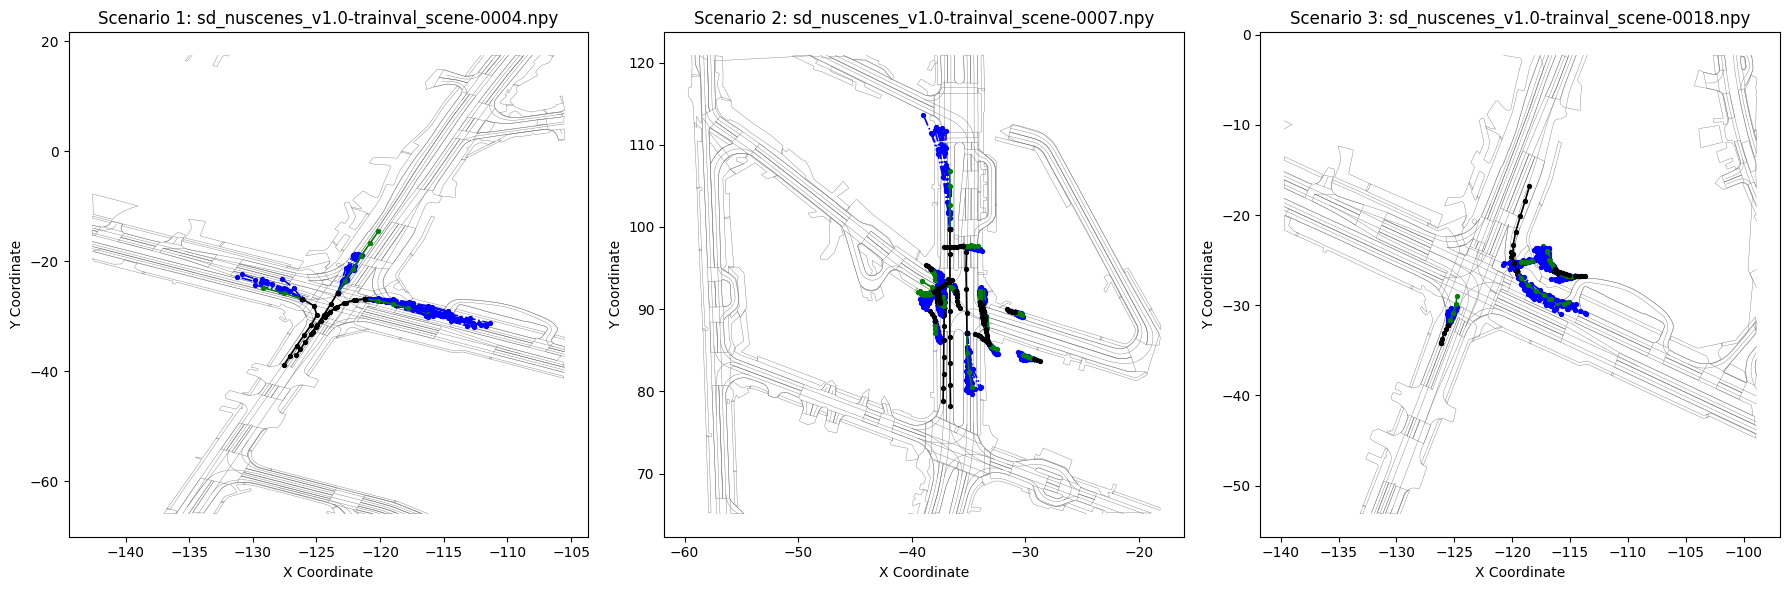

In [68]:
map_dir = '/data/tii/data/nuscenes/nuscenes_maps/nuscenes_trainval_maps_test'
data_real_dir = '/data/tii/data/nuscenes/nuscenes_trainval_clean_test/'
data_gen_dir = '/data/ahmed.ghorbel/workdir/autod/traffic-diffuser/results/TrafficDiffuser-L-map-mlp/samples'

selected_scenarios = ['sd_nuscenes_v1.0-trainval_scene-0004.npy',
                      'sd_nuscenes_v1.0-trainval_scene-0007.npy',
                      'sd_nuscenes_v1.0-trainval_scene-0018.npy']
map_list = [os.path.join(map_dir, file) for file in selected_scenarios]
data_real_list = [os.path.join(data_real_dir, file) for file in selected_scenarios]
data_gen_list = [os.path.join(data_gen_dir, '0084000_' + file) for file in selected_scenarios]

figsize = (18, 6)
num_samples = 10

# Create a single figure with 3 subplots (one for each scenario)
fig, axs = plt.subplots(1, 3, figsize=figsize)

for i, (l_real, l_gen, l_map) in enumerate(zip(sorted(data_real_list), sorted(data_gen_list), sorted(map_list))):
    print(l_real)
    print(l_gen)
    print(l_map)
    
    data_map = np.load(os.path.join(map_dir, l_map))
    data_real, data_gen = np.load(os.path.join(data_real_dir, l_real)), np.load(os.path.join(data_gen_dir, l_gen))
    data_hist, data_future = data_real[:, :8, :], data_real[:, 7:, :]
    print(f'Real data has shape: {data_real.shape}, and generated data has shape {data_gen.shape}')
    
    ax = axs[i]  # Select current subplot

    # Plot the map for the considered scene
    print(f'Map data has shape: {data_map.shape}')
    for ft in range(data_map.shape[0]):    
        ax.plot(data_map[ft, :, 0], data_map[ft, :, 1], color='gray', linewidth=0.3)

    epsilon = 0.1   # to discard the predicted padding because it's not exactly equal to zero
    for ag in range(data_future.shape[0]):  # Loop through each agent in the scene (MAX to 9 in clean testset)
        # Plot generated trajectories
        for sample_idx in range(num_samples):
            agent_gen = np.concatenate((data_future[ag, 0:1, :], data_gen[sample_idx, ag, :, :]), axis=0)
            valid_agent_gen = agent_gen[(np.abs(agent_gen[:, 0]) > epsilon) & (np.abs(agent_gen[:, 1]) > epsilon)]
            ax.plot(valid_agent_gen[:, 0], valid_agent_gen[:, 1], 'b-.o', linewidth=1.2, markersize=2.8)

        # Plot real future trajectories
        agent_hist, agent_future = data_hist[ag], data_future[ag]
        valid_agent_future = agent_future[(agent_future[:, 0] != 0.0) & (agent_future[:, 1] != 0.0)]
        ax.plot(valid_agent_future[:, 0], valid_agent_future[:, 1], 'g-o', linewidth=1.2, markersize=2.8)

        # Plot historical trajectories
        valid_agent_hist = agent_hist[(agent_hist[:, 0] != 0.0) & (agent_hist[:, 1] != 0.0)]
        ax.plot(valid_agent_hist[:, 0], valid_agent_hist[:, 1], 'k-o', linewidth=1.2, markersize=2.8)

    ax.set_title(f'Scenario {i+1}: {selected_scenarios[i]}')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')

plt.tight_layout()
plt.show()


#### 1.b) Plot scenarios from generated non-padded samples 

In [ ]:
data_real_dir = '/data/tii/data/nuscenes/nuscenes_trainval_veh_clean_test/'
data_gen_dir = '/data/ahmed.ghorbel/workdir/autod/TrafficDiffuser/results/008-TrafficDiffuser-B/samples/'

for l_real, l_gen in zip(sorted(os.listdir(data_real_dir)), sorted(os.listdir(data_gen_dir))):
    print(l_real)
    print(l_gen)
    data_real, data_gen = np.load(os.path.join(data_real_dir, l_real)), np.load(os.path.join(data_gen_dir, l_gen))
    data_hist, data_future = data_real[:, :8, :], data_real[:, 7:, :]
    print(f'Real data has shape: {data_real.shape}, and generated data has shape {data_gen.shape}')

    # Loop through each scene and plot separately
    plt.figure() 
    for ag in [i for i in range(data.shape[0])]:  # Loop through each agent in the scene (MAX to 9 in clean testset)    
        
        for sample_idx in range(10):
            agent_gen = np.concatenate((data_future[ag, 0:1, :], data_gen[sample_idx, ag, :, :]), axis=0)   
            plt.plot(agent_gen[:, 0], agent_gen[:, 1], 'b-.o', linewidth=1.2, markersize=2.8)
        
        agent_hist, agent_future = data_hist[ag], data_future[ag] 
        
        plt.plot(agent_future[:, 0], agent_future[:, 1], 'g-o', linewidth=1.2, markersize=2.8)
        
        plt.plot(agent_hist[:, 0], agent_hist[:, 1], 'k-o', linewidth=1.2, markersize=2.8)
        
    plt.show() 
    plt.close()  

#### 2) Plot padded scenarios from a dataset without generations

In [ ]:
dataset_summary, scenario_ids, mapping = read_dataset_summary(dataset_path='/data/tii/data/nuscenes/nuscenes_trainval_pkl')

scenario = read_scenario(dataset_path='/data/tii/data/nuscenes/nuscenes_trainval_pkl', mapping=mapping, scenario_file_name='sd_nuscenes_v1.0-trainval_scene-0001.pkl')

for k in scenario['map_features'].keys():
    if scenario['map_features'][k]['type'] in ['LANE_SURFACE_STREET', 'LANE_SURFACE_UNSTRUCTURE', 'ROAD_LINE_SOLID_SINGLE_YELLOW', 'ROAD_LINE_BROKEN_SINGLE_WHITE', 'CROSSWALK', 'ROAD_EDGE_SIDEWALK']:
        for kk in scenario['map_features'][k].keys():
            if kk == 'polyline':
                polyline_arr = scenario['map_features'][k][kk]
                # Plot the polyline
                plt.plot(polyline_arr[:, 0], polyline_arr[:, 1])
            elif kk == 'polygon':
                polygon_arr = scenario['map_features'][k][kk]
                # Plot the polygon
                plt.plot(polygon_arr[:, 0], polygon_arr[:, 1])

In [ ]:
data_real_dir = '/data/tii/data/argoverse/npy/train_npy_clean/'
max_plots = 10000
figsize = (100, 100)
fig = plt.figure(figsize=figsize)
for l_real in sorted(os.listdir(data_real_dir))[:max_plots]:
    print(l_real)
    data_real = np.load(os.path.join(data_real_dir, l_real))
    data_hist, data_future = data_real[:, :8, :], data_real[:, 7:, :]
    print(f'Real data has shape: {data_real.shape}')

    # Loop through each scene and plot separately
    #plt.figure(figsize=figsize) 
    for ag in [i for i in range(data_hist.shape[0])]:  # Loop through each agent in the scene   
        agent_hist, agent_future = data_hist[ag], data_future[ag] 
        
        valid_agent_future = agent_future[(agent_future[:, 0] != 0.0) & (agent_future[:, 1] != 0.0)]
        plt.plot(valid_agent_future[:, 0], valid_agent_future[:, 1], 'g-o', linewidth=1.2, markersize=2.8)
        
        valid_agent_hist = agent_hist[(agent_hist[:, 0] != 0.0) & (agent_hist[:, 1] != 0.0)]
        plt.plot(valid_agent_hist[:, 0], valid_agent_hist[:, 1], 'k-o', linewidth=1.2, markersize=2.8)
    #plt.show() 
    #plt.close()
fig.savefig('/data/tii/data/argoverse/10000_data.png')
        
plt.show() 
plt.close()
  

#### 3) Plot padded and non-padded dataset (multicolors)

In [ ]:
plt.figure(figsize=(10, 10))
data_dir = '/data/tii/data/nuscenes/nuscenes_trainval_clean_train'
for filename in os.listdir(data_dir):
    if filename.endswith('.npy'):
        # Load .npy file
        file_path = os.path.join(data_dir, filename)
        print(file_path)
        npy_data = np.load(file_path)
        print(npy_data.shape)
        for ag in range(npy_data.shape[0]):
            agent_traj = npy_data[ag, :, :]
            print(agent_traj.shape)
            print(filename)
            plt.plot(agent_traj[:, 0], agent_traj[:, 1])

In [ ]:
plt.figure(figsize=(10, 10))
data_dir = '/data/tii/data/nuscenes/nuscenes_trainval_clean_train'
for filename in os.listdir(data_dir):
    if filename.endswith('.npy'):
        # Load .npy file
        file_path = os.path.join(data_dir, filename)
        print(file_path)
        npy_data = np.load(file_path)
        for ag in range(npy_data.shape[0]):
            agent_traj = npy_data[ag, :, :]
            valid_xy = agent_traj[(agent_traj[:, 0] != 0.0) & (agent_traj[:, 1] != 0.0)]
            print(valid_xy.shape)
            print(filename)
            plt.plot(valid_xy[:, 0], valid_xy[:, 1])